In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("Dataset .csv",on_bad_lines='skip')

In [6]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
df.columns = [col.strip() for col in df.columns]

In [8]:
price_col = 'Price range'
delivery_col = 'Has Online delivery'
booking_col = 'Has Table booking'

In [9]:
for col in [price_col, delivery_col, booking_col]:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in dataset.")

In [10]:
df[delivery_col] = df[delivery_col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df[booking_col] = df[booking_col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

In [11]:
df.dropna(subset=[price_col, delivery_col, booking_col], inplace=True)

In [12]:
df_cleaned = df.dropna(subset=[price_col, delivery_col, booking_col])

## Determine if higher-priced restaurants are more likely to offer these services.

In [13]:
grouped = df_cleaned.groupby(price_col).agg({
    delivery_col: 'mean',
    booking_col: 'mean',
    price_col: 'count'
}).rename(columns={
    delivery_col: 'Online Delivery Rate',
    booking_col: 'Table Booking Rate',
    price_col: 'Restaurant Count'
})

In [14]:
grouped['Online Delivery Rate'] *= 100
grouped['Table Booking Rate'] *= 100

In [15]:
print("📊 Percentage of Restaurants Offering Services by Price Range:\n")
print(grouped[['Online Delivery Rate', 'Table Booking Rate']])

📊 Percentage of Restaurants Offering Services by Price Range:

             Online Delivery Rate  Table Booking Rate
Price range                                          
1                       15.774077            0.022502
2                       41.310633            7.677482
3                       29.190341           45.738636
4                        9.044369           46.757679


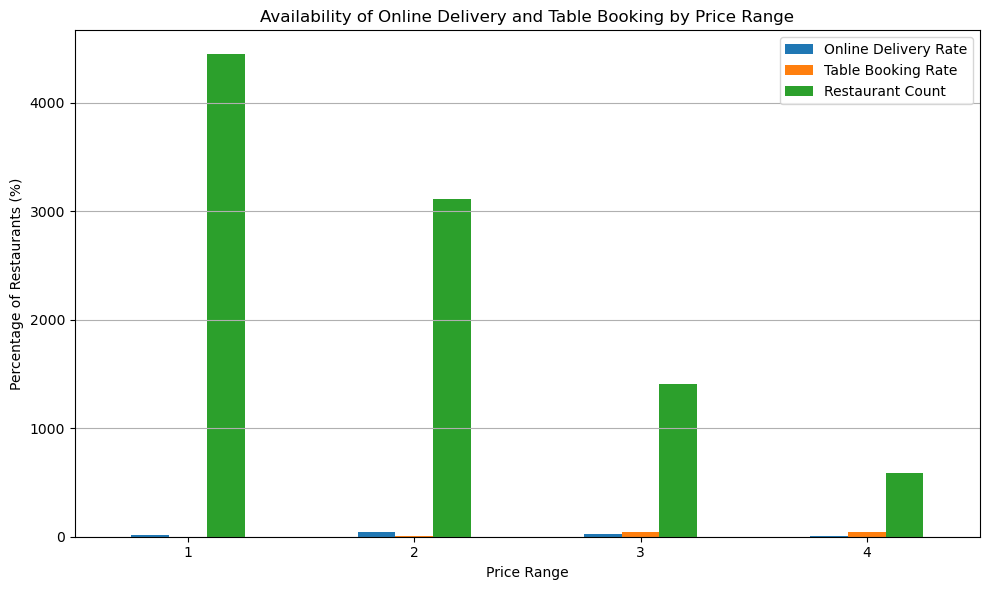

In [16]:
grouped.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Availability of Online Delivery and Table Booking by Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.xlabel('Price Range')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##  Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

C:\Users\krish\AppData\Local\Temp\ipykernel_4140\2933322585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y='Online Delivery Rate', data=grouped, palette='Blues_d')


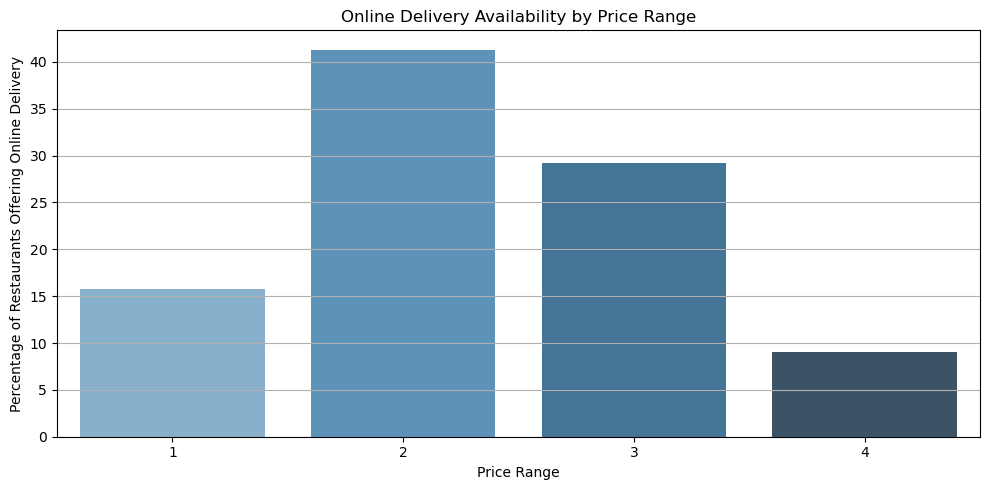

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=grouped.index, y='Online Delivery Rate', data=grouped, palette='Blues_d')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants Offering Online Delivery')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_4140\1426936765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y='Table Booking Rate', data=grouped, palette='Greens_d')


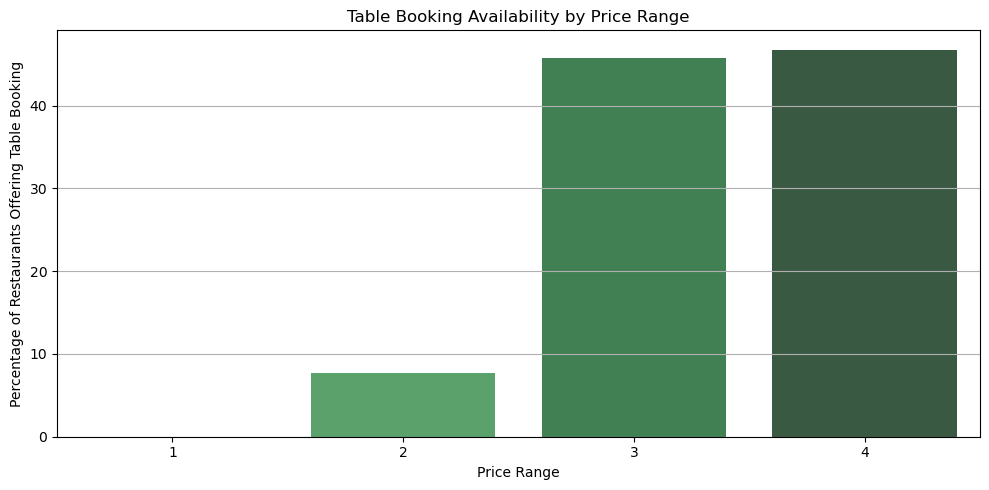

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=grouped.index, y='Table Booking Rate', data=grouped, palette='Greens_d')
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants Offering Table Booking')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
highest_delivery_price_range = grouped['Online Delivery Rate'].idxmax()
highest_booking_price_range = grouped['Table Booking Rate'].idxmax()

print(f"\n✅ Restaurants in price range {highest_delivery_price_range} offer online delivery the most ({grouped['Online Delivery Rate'].max():.2f}%).")
print(f"✅ Restaurants in price range {highest_booking_price_range} offer table booking the most ({grouped['Table Booking Rate'].max():.2f}%).")


✅ Restaurants in price range 2 offer online delivery the most (41.31%).
✅ Restaurants in price range 4 offer table booking the most (46.76%).


## chi-square test

In [20]:
from scipy.stats import chi2_contingency

In [21]:
print("\n📈 Chi-square Test: Price Range vs Online Delivery")
contingency_delivery = pd.crosstab(df[price_col], df[delivery_col])
chi2_d, p_d, _, _ = chi2_contingency(contingency_delivery)
print(f"Chi2 Statistic: {chi2_d:.4f}, p-value: {p_d:.4f}")
if p_d < 0.05:
    print("✅ There is a statistically significant relationship.")
else:
    print("❌ No significant relationship found.")


📈 Chi-square Test: Price Range vs Online Delivery
Chi2 Statistic: 721.3787, p-value: 0.0000
✅ There is a statistically significant relationship.


In [22]:
print("\n📈 Chi-square Test: Price Range vs Table Booking")
contingency_booking = pd.crosstab(df[price_col], df[booking_col])
chi2_b, p_b, _, _ = chi2_contingency(contingency_booking)
print(f"Chi2 Statistic: {chi2_b:.4f}, p-value: {p_b:.4f}")
if p_b < 0.05:
    print("✅ There is a statistically significant relationship.")
else:
    print("❌ No significant relationship found.")


📈 Chi-square Test: Price Range vs Table Booking
Chi2 Statistic: 2821.5809, p-value: 0.0000
✅ There is a statistically significant relationship.
